In [336]:
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.random.mtrand import random_sample


In [337]:
def rbf_cal(x, C, S):
    #c mu 
    #s sigma
    
    return (1 / np.sqrt(2 * np.pi * (S ** 2))) * np.exp((-(x - C) ** 2) / (2 * (S ** 2)))



In [338]:
def get_distance(x1, x2):
        sum = 0
        for i in range(len(x1)):
            sum += (x1[i] - x2[i]) ** 2
        return np.sqrt(sum)

In [339]:
class RBF:
    def __init__(self, num_of_classes: int, eta: float = 0.001):
        self.nc = num_of_classes
        self.eta = eta
        self.w = np.random.rand(num_of_classes)
        self.b = np.random.rand(num_of_classes)
        self.centers = None
        self.stds = None
    
    
        
    def k_means(self,X: np.array, max_iters = 10000):
        centers = X[np.random.choice(range(len(X)), self.nc, replace=False)]
        print("centers hamoon avale k means",centers)

        converged = False
        
        current_iter = 0

        while (not converged) and (current_iter < max_iters):
            
            cluster_list = [[] for i in range(len(centers))]
            print("cluster list size",len(cluster_list))
            for x in X:
                distances_list = []
                for c in centers:
                    distances_list.append(get_distance(c, x))
                    cluster_list[int(np.argmin(distances_list))].append(x)

            print("cluster list size &&&",len(cluster_list))

            cluster_list = list((filter(None, cluster_list)))
            print("cluster list size &&&",len(cluster_list))

            prev_centers = centers.copy()

            centers = []
            print("size for",len(cluster_list))
            for j in range(len(cluster_list)):
                centers.append(np.mean(cluster_list[j], axis=0))
                print("centers tooye tooye for k means",centers)


            pattern = np.abs(np.sum(prev_centers) - np.sum(centers))

            # print('K-MEANS: ', int(pattern))

            converged = (pattern == 0)

            current_iter += 1
        print("centers tahe k means",centers)
        self.centers=np.array(centers)
        print("centers",self.centers)
        self.stds = [np.std(x) for x in cluster_list]
        return np.array(centers), [np.std(x) for x in cluster_list]
    def train(self, X, y, epochs = 100):
        


        for epoch in range(epochs):
        #     for i in range (len(real_cluster[0])):
            for i in range (X.shape[0]):
            
                print(i)
                print(self.centers)
                a=np.array([rbf_cal(X[i],c,s) for c, s, in zip(self.centers, self.stds)])
                print("a",a)
                print("w",self.w)
                F=a.T.dot(self.w)+self.b
                # a = np.array([N(X[i], c, s) for c,s in zip(self.centers, self.stds)])
                # F = a.T.dot(self.w) + self.b

                print("a",a)
                loss= (y[i] - F).flatten() **2
                print('loss: {0:.2f}'.format(loss[0]))

                #backward pass
                error=-(y[i] - F).flatten()

                #online update
                self.w = (self.w - self.eta * a.T * error).flatten()
                self.b = self.b - self.eta * error
    def predict(self,x):
        # print("x tooye predict",x)
        # print("c tooye predict",centers)
        # print("s tooye predict",stds)
        
        # print(" ",[rbf(x, c, s) + b for b, c, s in zip(b, centers, stds)])
        # print("baadesh too predict",[w * rbf(x, c, s) + b for w, b, c, s in zip(w, b, centers, stds)])
        # print("ba sum",sum([w * rbf(x, c, s) + b for w, b, c, s in zip(w, b, centers, stds)]))
        return sum([w * rbf_cal(x, c, s) + b for w, b, c, s in zip(self.w, self.b, self.centers, self.stds)])
    def fit(self, X: np.array):
        self.centers, self.stds = self.k_means(X, self.nc)
        print(self.centers, self.stds)

(100,)
x [0.0044096  0.01293688 0.01717137 0.01865517 0.02103257 0.03784342
 0.06039755 0.07051808 0.07063271 0.07757143 0.08342637 0.09720499
 0.12372437 0.13503402 0.1469745  0.15946686 0.16359    0.16435787
 0.17070234 0.17350046 0.17414394 0.17755686 0.18237838 0.19543468
 0.22848336 0.2297454  0.26085624 0.26553542 0.27478145 0.27828074
 0.29044274 0.29428032 0.29931861 0.32863727 0.36225426 0.36517406
 0.37508199 0.37799792 0.38103901 0.38882488 0.39390947 0.40964226
 0.40964882 0.43146356 0.43364002 0.43461278 0.44204942 0.44930699
 0.45401598 0.46119851 0.46182549 0.49017069 0.49394202 0.50282044
 0.50390856 0.50786563 0.51891535 0.52186953 0.53113653 0.53168305
 0.55145395 0.56040734 0.56412507 0.5870081  0.58917531 0.59339666
 0.59677186 0.60646392 0.65998133 0.66672657 0.68120891 0.6813949
 0.68438991 0.69472278 0.72746205 0.73257926 0.73880982 0.74133974
 0.77040685 0.77064365 0.77996507 0.81870513 0.83904134 0.85471688
 0.85919621 0.85923802 0.86828248 0.87841415 0.887157 

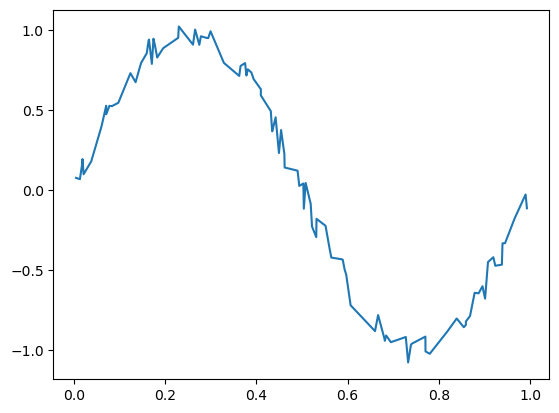

In [340]:
# sample inputs and add noise
NUM_SAMPLES = 100
X = np.random.uniform(0., 1., NUM_SAMPLES)
X = np.sort(np.array(X), axis=0)
noise = np.random.uniform(-0.1, 0.1, NUM_SAMPLES)
y = np.sin(2 * np.pi * X)  + noise
print(y.shape)
plt.plot(X,y)
print("x",X)
print("y",y)
# rbfnet = RBFNet(lr=1e-2, k=2)
# rbfnet.fit(X, y)
# y_pred = rbfnet.predict(X)
# plt.plot(X, y, '-o', label='true')
# plt.plot(X, y_pred, '-o', label='RBF-Net')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [341]:
# k = KMeans(K=2, max_iters=150, plot_steps=True)
# ####
x = np.expand_dims(X, 1)
rbf = RBF(2)
rbf.fit(x)
rbf.train(x, y, epochs = 100)

print("centers",rbf.centers)
# print("y",y)
# y_new=np.reshape(y,(len(y),1))
# print("new y",y_new)
# print("this",np.array(np.concatenate((np.reshape(y,(len(y),1)), np.reshape(X,(len(X),1))),axis=1)))
# y_pred = k.predict(np.array(np.concatenate((np.reshape(X,(len(X),1)), np.reshape(y,(len(y),1))),axis=1)))

centers hamoon avale k means [[0.46182549]
 [0.27478145]]
cluster list size 2
cluster list size &&& 2
cluster list size &&& 2
size for 2
centers tooye tooye for k means [array([0.54972769])]
centers tooye tooye for k means [array([0.54972769]), array([0.16712373])]
cluster list size 2
cluster list size &&& 2
cluster list size &&& 2
size for 2
centers tooye tooye for k means [array([0.54748656])]
centers tooye tooye for k means [array([0.54748656]), array([0.15555959])]
centers tahe k means [array([0.54748656]), array([0.15555959])]
centers [[0.54748656]
 [0.15555959]]
[[0.54748656]
 [0.15555959]] [0.26835464358632355, 0.09516548492065247]
0
[[0.54748656]
 [0.15555959]]
a [[0.19181357]
 [1.18752766]]
w [0.32880985 0.01776005]
a [[0.19181357]
 [1.18752766]]
loss: 0.98
1
[[0.54748656]
 [0.15555959]]
a [[0.20445039]
 [1.36366638]]
w [0.32862011 0.01679414]
a [[0.20445039]
 [1.36366638]]
loss: 1.00
2
[[0.54748656]
 [0.15555959]]
a [[0.21095246]
 [1.45626139]]
w [0.32841521 0.01566693]
a [[0

stds

i [array([0.0044096]), array([0.01293688]), array([0.01717137]), array([0.01865517]), array([0.02103257]), array([0.03784342]), array([0.06039755]), array([0.07051808]), array([0.07063271]), array([0.07757143]), array([0.08342637]), array([0.09720499]), array([0.12372437]), array([0.13503402]), array([0.1469745]), array([0.15946686]), array([0.16359]), array([0.16435787]), array([0.17070234]), array([0.17350046]), array([0.17414394]), array([0.17755686]), array([0.18237838]), array([0.19543468]), array([0.22848336]), array([0.2297454]), array([0.26085624]), array([0.26553542]), array([0.27478145]), array([0.27828074]), array([0.29044274]), array([0.29428032]), array([0.29931861]), array([0.32863727]), array([0.36225426]), array([0.36517406]), array([0.37508199]), array([0.37799792]), array([0.38103901]), array([0.38882488]), array([0.39390947]), array([0.40964226]), array([0.40964882]), array([0.43146356]), array([0.43364002]), array([0.43461278]), array([0.44204942]), array([0.4493069

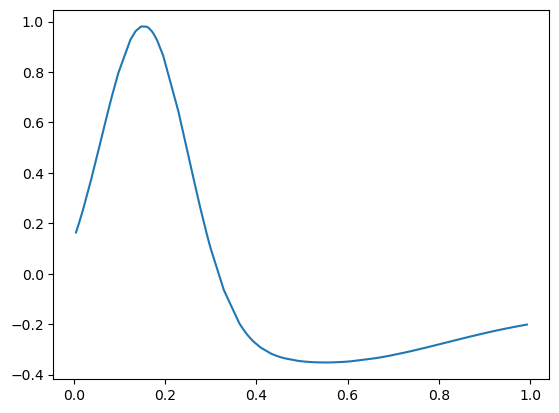

In [342]:
result = [rbf.predict(i) for i in x]
print("i",[i for i in x])

print(x.shape)
print(result)
plt.plot(x,result)
plt.show()

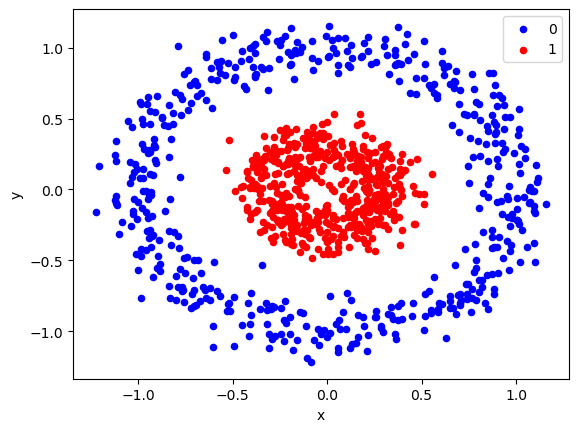

In [348]:
from sklearn.datasets import make_blobs, make_circles
from pandas import DataFrame


x, y = make_circles(n_samples=1000, noise=0.1, factor=0.3)
# x, y = make_blobs(n_samples=1000, centers=2, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = lambda x: 'red' if x > 0.5 else 'blue'
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors(key))
plt.show()

In [349]:
rbf = RBF(num_of_classes=2)
x_tamrin_n = np.expand_dims(x[:,0], 1)
rbf.fit(x_tamrin_n)


rbf.train(x_tamrin_n, y, 30)




centers hamoon avale k means [[0.2858846 ]
 [0.28654714]]
cluster list size 2
cluster list size &&& 2
cluster list size &&& 2
size for 2
centers tooye tooye for k means [array([-0.10050885])]
centers tooye tooye for k means [array([-0.10050885]), array([0.65790581])]
cluster list size 2
cluster list size &&& 2
cluster list size &&& 2
size for 2
centers tooye tooye for k means [array([-0.10184254])]
centers tooye tooye for k means [array([-0.10184254]), array([0.64984674])]
centers tahe k means [array([-0.10184254]), array([0.64984674])]
centers [[-0.10184254]
 [ 0.64984674]]
[[-0.10184254]
 [ 0.64984674]] [0.49069757303974737, 0.26508585287380054]
0
[[-0.10184254]
 [ 0.64984674]]
a [[0.8119636 ]
 [0.02059808]]
w [0.27181874 0.93682685]
a [[0.8119636 ]
 [0.02059808]]
loss: 0.27
1
[[-0.10184254]
 [ 0.64984674]]
a [[0.78839294]
 [0.00661314]]
w [0.27223894 0.93682741]
a [[0.78839294]
 [0.00661314]]
loss: 0.29
2
[[-0.10184254]
 [ 0.64984674]]
a [[0.52330464]
 [0.8236037 ]]
w [0.27266165 0.

0           [0.68430738865433]
1         [0.6580920666388375]
2         [0.3851253140709633]
3       [0.007849434287359458]
4      [0.0006447063064020514]
                ...           
995       [0.5944928624969715]
996       [0.6846933589857296]
997       [0.6676145343040427]
998       [0.6562730871160767]
999      [0.40794572195958634]
Name: label, Length: 1000, dtype: object


TypeError: unhashable type: 'numpy.ndarray'

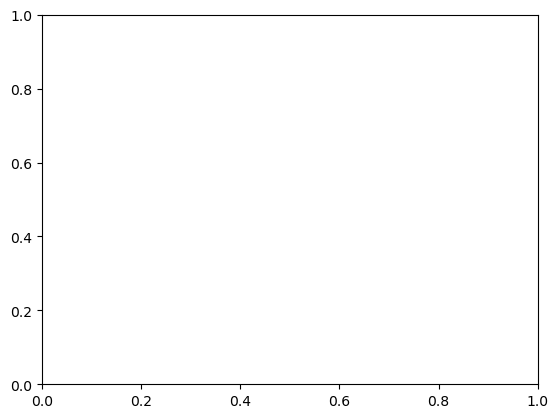

In [403]:
import pandas as p
pred = [rbf.predict(i) for i in x_tamrin_n]

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=pred))

colors = lambda x: 'red' if x > 0.5 else 'blue'
print(df.label)

fig, ax = plt.subplots()

for key, grp in df.groupby(['label']):
    ax = grp.plot(ax=ax, kind='scatter', x='x', y='y', c=key, label=key)

plt.legend(loc='best')
plt.show()


In [406]:
import seaborn as sns

sns.lineplot(data=df, x='x', y='y', hue='label')

ValueError: Could not interpret value `x` for parameter `x`

In [ ]:
# x, y = make_blobs(n_samples=1000, centers=2, n_features=2)